In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import sklearn.linear_model
import datetime

In [87]:
grains = pd.read_csv('Downloads/Final_Project/Meat/Grains_Clean.csv')

In [93]:
meat_oil = pd.read_csv('Downloads/Final_Project/Meat/Meat_Oil_Clean.csv')

In [90]:
grains = grains.set_index(pd.date_range('1867-1-1', periods=150, freq='A'))

In [91]:
grains.head()

Corn_Price  Barley_Price  Oats_Price  Sorghum_Price
1867-12-31 00:00:00        0.66          0.95        0.47            NaN
1868-12-31 00:00:00        0.78          1.22        0.59            NaN
1869-12-31 00:00:00        0.62          1.49        0.54            NaN
1870-12-31 00:00:00        0.73          0.87        0.46            NaN
1871-12-31 00:00:00        0.52          0.85        0.43            NaN

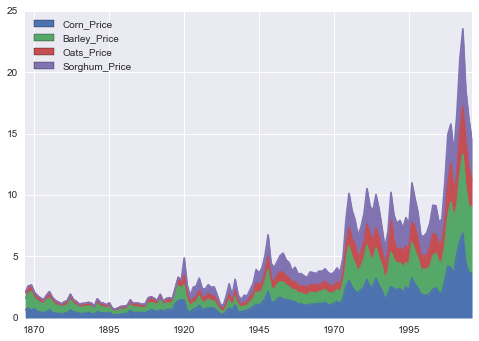

In [165]:
grains.plot.area()

In [185]:
grains.corr()

Corn_Price  Barley_Price  Oats_Price  Sorghum_Price
Corn_Price       1.000000      0.946257    0.955720       0.991569
Barley_Price     0.946257      1.000000    0.971819       0.939369
Oats_Price       0.955720      0.971819    1.000000       0.942509
Sorghum_Price    0.991569      0.939369    0.942509       1.000000

In [97]:
meat_oil = meat_oil.set_index(pd.date_range('1986-1-1', periods=360, freq='M'))

In [98]:
meat_oil.head()

Beef_Farm_Price  Beef_Wholesale_Price  Beef_Retail_Price  \
1986-01-31            129.0                 152.6              232.9   
1986-02-28            121.6                 143.1              228.5   
1986-03-31            120.4                 141.0              226.4   
1986-04-30            116.8                 137.8              223.1   
1986-05-31            121.0                 142.8              222.9   

            Pork_Farm_Price  Pork_Wholesale_Price  Pork_Retail_Price  \
1986-01-31            85.55                104.15             178.80   
1986-02-28            81.62                100.58             178.06   
1986-03-31            76.90                 97.11             175.42   
1986-04-30            76.01                 96.38             171.61   
1986-05-31            89.83                108.04             171.71   

            Chicken_Retail_Price  Oil_Price  
1986-01-31                119.59      22.93  
1986-02-28                117.20      15.46  
1986-03-31                115.46      12.61  
1986-04-30                116.44      12.84  
1986-05-31                116.49      15.38

In [99]:
def cents_to_dollars(x):
    return x/100

In [143]:
cent_prices = ['Beef_Farm_Price','Beef_Wholesale_Price', 'Beef_Retail_Price',
              'Pork_Farm_Price', 'Pork_Wholesale_Price', 'Pork_Retail_Price',
              'Chicken_Retail_Price']
beef_prices = ['Beef_Farm_Price','Beef_Wholesale_Price', 'Beef_Retail_Price']
pork_prices = ['Pork_Farm_Price', 'Pork_Wholesale_Price', 'Pork_Retail_Price']
retail_meat = ['Beef_Retail_Price', 'Pork_Retail_Price', 'Chicken_Retail_Price']

In [101]:
meat_oil[cent_prices] = meat_oil[cent_prices].apply(cents_to_dollars)

In [102]:
meat_oil.head()

Beef_Farm_Price  Beef_Wholesale_Price  Beef_Retail_Price  \
1986-01-31            1.290                 1.526              2.329   
1986-02-28            1.216                 1.431              2.285   
1986-03-31            1.204                 1.410              2.264   
1986-04-30            1.168                 1.378              2.231   
1986-05-31            1.210                 1.428              2.229   

            Pork_Farm_Price  Pork_Wholesale_Price  Pork_Retail_Price  \
1986-01-31           0.8555                1.0415             1.7880   
1986-02-28           0.8162                1.0058             1.7806   
1986-03-31           0.7690                0.9711             1.7542   
1986-04-30           0.7601                0.9638             1.7161   
1986-05-31           0.8983                1.0804             1.7171   

            Chicken_Retail_Price  Oil_Price  
1986-01-31                1.1959      22.93  
1986-02-28                1.1720      15.46  
1986-03-31                1.1546      12.61  
1986-04-30                1.1644      12.84  
1986-05-31                1.1649      15.38

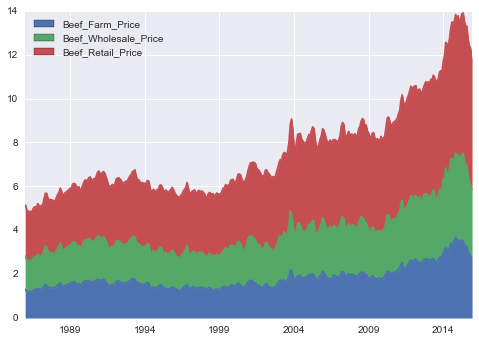

In [187]:
meat_oil[beef_prices].plot.area()

In [175]:
meat_oil[beef_prices].corr()

Beef_Farm_Price  Beef_Wholesale_Price  Beef_Retail_Price
Beef_Farm_Price              1.000000              0.988965           0.941667
Beef_Wholesale_Price         0.988965              1.000000           0.964909
Beef_Retail_Price            0.941667              0.964909           1.000000

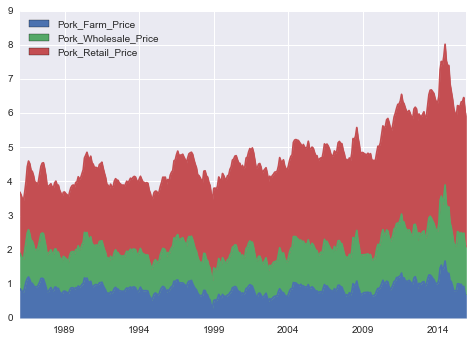

In [163]:
meat_oil[pork_prices].plot.area()

In [176]:
meat_oil[pork_prices].corr()

Pork_Farm_Price  Pork_Wholesale_Price  Pork_Retail_Price
Pork_Farm_Price              1.000000              0.863852           0.415082
Pork_Wholesale_Price         0.863852              1.000000           0.792050
Pork_Retail_Price            0.415082              0.792050           1.000000

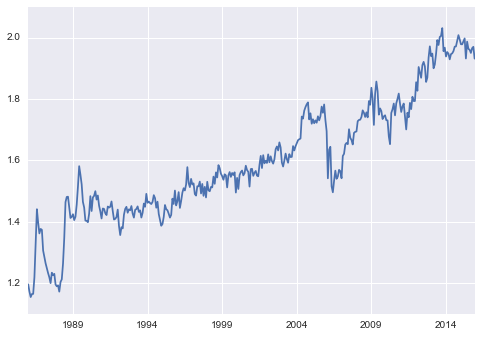

In [189]:
meat_oil['Chicken_Retail_Price'].plot()

In [181]:
meat_oil['Chicken_Retail_Price'].autocorr()

0.9858980498180423

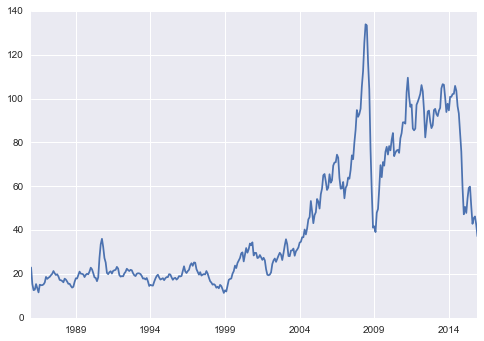

In [114]:
meat_oil['Oil_Price'].plot()

In [202]:
meat_oil['Oil_Price'].autocorr()

0.99002947954733211

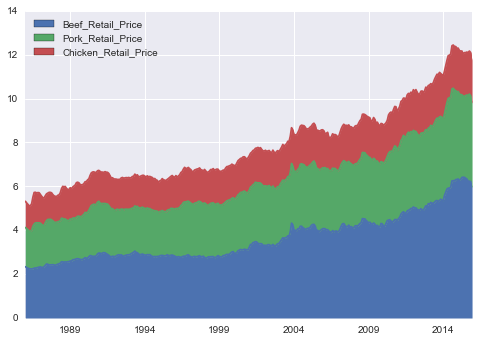

In [156]:
meat_oil[retail_meat].plot.area()

In [191]:
meat_oil[retail_meat].corr()

Beef_Retail_Price  Pork_Retail_Price  \
Beef_Retail_Price              1.000000           0.963571   
Pork_Retail_Price              0.963571           1.000000   
Chicken_Retail_Price           0.929023           0.937015   

                      Chicken_Retail_Price  
Beef_Retail_Price                 0.929023  
Pork_Retail_Price                 0.937015  
Chicken_Retail_Price              1.000000

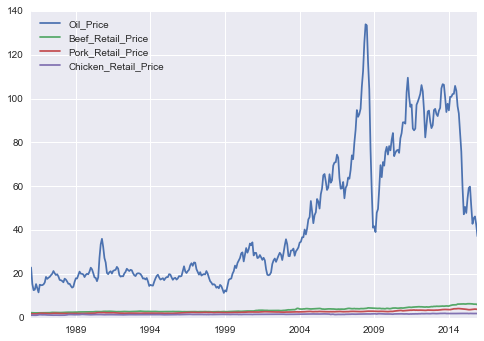

In [158]:
meat_oil[['Oil_Price', 'Beef_Retail_Price', 'Pork_Retail_Price', 'Chicken_Retail_Price']].plot()

In [182]:
meat_oil[['Oil_Price', 'Beef_Retail_Price', 'Pork_Retail_Price', 'Chicken_Retail_Price']].corr()

Oil_Price  Beef_Retail_Price  Pork_Retail_Price  \
Oil_Price              1.000000           0.805170           0.806237   
Beef_Retail_Price      0.805170           1.000000           0.963571   
Pork_Retail_Price      0.806237           0.963571           1.000000   
Chicken_Retail_Price   0.771839           0.929023           0.937015   

                      Chicken_Retail_Price  
Oil_Price                         0.771839  
Beef_Retail_Price                 0.929023  
Pork_Retail_Price                 0.937015  
Chicken_Retail_Price              1.000000